In [41]:
import pandas as pd

# Load the dataset
df = pd.read_excel("GooglePlaystore.xlsx")

# Preview the first 5 rows
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [42]:
df = df[df['Reviews'] != "3.0M"]
print("Removed row with 'Reviews' = '3.0M'")
df.head()


Removed row with 'Reviews' = '3.0M'


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [43]:
print("Data shape after removing '3.0M':", df.shape)


Data shape after removing '3.0M': (10840, 13)


In [44]:
df = df[~df.isin(["Varies with device"]).any(axis=1)]
print("Removed rows with 'Varies with device' in any column.")
print("Data shape now:", df.shape)


Removed rows with 'Varies with device' in any column.
Data shape now: (9059, 13)


In [57]:
import re

def clean_android_ver(val):
    if pd.isnull(val):
        return None
    # Convert to string, take first part before space
    val = str(val).split(" ")[0]
    # If there's a range, take the first part
    val = val.split('-')[0]
    # Use regex to capture x.y 
    match = re.match(r"(\d+\.\d+)", val)
    return float(match.group(1)) if match else None

df['Android Ver'] = df['Android Ver'].apply(clean_android_ver)

print("Cleaned 'Android Ver' column.")
df['Android Ver'].unique()


Cleaned 'Android Ver' column.


array([4. , 4.4, 2.3, 4.2, 3. , 4.1, 2.2, 6. , 5. , 1.6, 2.1, 5.1, 1.5,
       7. , 4.3, 2. , 3.2, 7.1, 8. , 3.1, nan, 1. ])

In [58]:
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '', regex=False)

# Keep only numeric
df = df[df['Installs'].str.isnumeric()]

# Convert to int
df['Installs'] = df['Installs'].astype(int)

print("Cleaned 'Installs' column. Sample:")
df['Installs'].head()


Cleaned 'Installs' column. Sample:


0      10000
1     500000
2    5000000
4     100000
5      50000
Name: Installs, dtype: int64

In [48]:
# 1.6a: Remove rows if Rating is null, Reviews<100, Installs<50000
df = df[~((df['Rating'].isnull()) &
          (df['Reviews'].astype(str).str.isnumeric()) &
          (df['Reviews'].astype(int) < 100) &
          (df['Installs'] < 50000))]

# 1.6b: Fill remaining missing ratings with category-wise average
df['Rating'] = df.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(round(x.mean(), 2))
)

print("Handled missing 'Rating' values.")
print("Data shape now:", df.shape)


Handled missing 'Rating' values.
Data shape now: (7685, 13)


In [49]:
def convert_size(size):
    if pd.isnull(size):
        return None
    s = str(size).upper().replace(",", "").strip()
    if s.endswith("M"):
        return int(float(s[:-1]) * 1_000_000)
    elif s.endswith("K"):
        return int(float(s[:-1]) * 1_000)
    elif s.replace('.', '', 1).isdigit():
        return int(float(s))
    else:
        return None

df['Size'] = df['Size'].apply(convert_size)

print("Converted 'Size' column. Sample:")
df['Size'].head()


Converted 'Size' column. Sample:


0    19000000
1    14000000
2     8700000
4     2800000
5     5600000
Name: Size, dtype: int64

In [51]:
category_rating_stats = df.groupby('Category')['Rating'].describe()
print("Category-wise Rating Statistics:")
display(category_rating_stats)


Category-wise Rating Statistics:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


In [52]:
# Filter free apps
free_apps_df = df[df['Type'] == 'Free'].copy()

# Convert Reviews to int if needed
free_apps_df['Reviews'] = free_apps_df['Reviews'].astype(int)

def get_top_3(df, column):
    return (df.sort_values(by=column, ascending=False)
              .groupby('Category')
              .head(3)[['Category', 'App', column]])

top_rated = get_top_3(free_apps_df, 'Rating')
top_installed = get_top_3(free_apps_df, 'Installs')
top_reviewed = get_top_3(free_apps_df, 'Reviews')

print("Top 3 Free Apps by Rating:")
display(top_rated.head(10))  # show a few
print("\nTop 3 Free Apps by Installs:")
display(top_installed.head(10))
print("\nTop 3 Free Apps by Reviews:")
display(top_reviewed.head(10))


Top 3 Free Apps by Rating:


,Category,App,Rating
10837,FAMILY,Fr. Mike Schmitz Audio Teachings,5.0
8104,LIFESTYLE,Cy-Fair Christian Church,5.0
8275,FAMILY,DC N COMPANY ENTERTAINMENT RADIO!,5.0
10564,SPORTS,FK Dedinje BGD,5.0
8260,COMICS,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
8234,BUSINESS,DB Pickles,5.0
8230,LIFESTYLE,DB HOME,5.0
8159,TOOLS,CZ Kompas,5.0
8146,BOOKS_AND_REFERENCE,CZ-Help,5.0
329,COMICS,Hojiboy Tojiboyev Life Hacks,5.0



Top 3 Free Apps by Installs:


,Category,App,Installs
1872,GAME,Subway Surfers,1000000000
3736,NEWS_AND_MAGAZINES,Google News,1000000000
1917,GAME,Subway Surfers,1000000000
1654,GAME,Subway Surfers,1000000000
3816,NEWS_AND_MAGAZINES,Google News,1000000000
3765,NEWS_AND_MAGAZINES,Google News,1000000000
4566,TOOLS,SHAREit - Transfer & Share,500000000
3255,TOOLS,SHAREit - Transfer & Share,500000000
3879,FAMILY,Pou,500000000
3971,COMMUNICATION,UC Browser - Fast Download Private & Secure,500000000



Top 3 Free Apps by Reviews:


,Category,App,Reviews
1879,GAME,Clash of Clans,44893888
1704,GAME,Clash of Clans,44891723
1670,GAME,Clash of Clans,44891723
3986,FAMILY,Clash of Clans,44881447
3987,FAMILY,Clash Royale,23125280
3994,FAMILY,Candy Crush Saga,22419455
420,COMMUNICATION,UC Browser - Fast Download Private & Secure,17714850
378,COMMUNICATION,UC Browser - Fast Download Private & Secure,17712922
3971,COMMUNICATION,UC Browser - Fast Download Private & Secure,17712922
3953,SPORTS,8 Ball Pool,14184910


In [53]:
paid_apps = df[df['Type'] == 'Paid'].copy()
paid_apps['Price'] = paid_apps['Price'].astype(str).str.replace('$', '', regex=False)
paid_apps['Price'] = pd.to_numeric(paid_apps['Price'], errors='coerce')

avg_price = paid_apps['Price'].mean()
max_price = paid_apps['Price'].max()
min_price = paid_apps['Price'].min()

print(f"Average Price: ${avg_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")


Average Price: $15.14
Maximum Price: $400.00
Minimum Price: $0.99


In [ ]:
df['Genres'] = df['Genres'].astype(str).str.split(';')
df_exploded = df.explode('Genres')
genre_counts = df_exploded['Genres'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(
    genre_counts, 
    labels=genre_counts.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title("Distribution of Apps by Genre")
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()


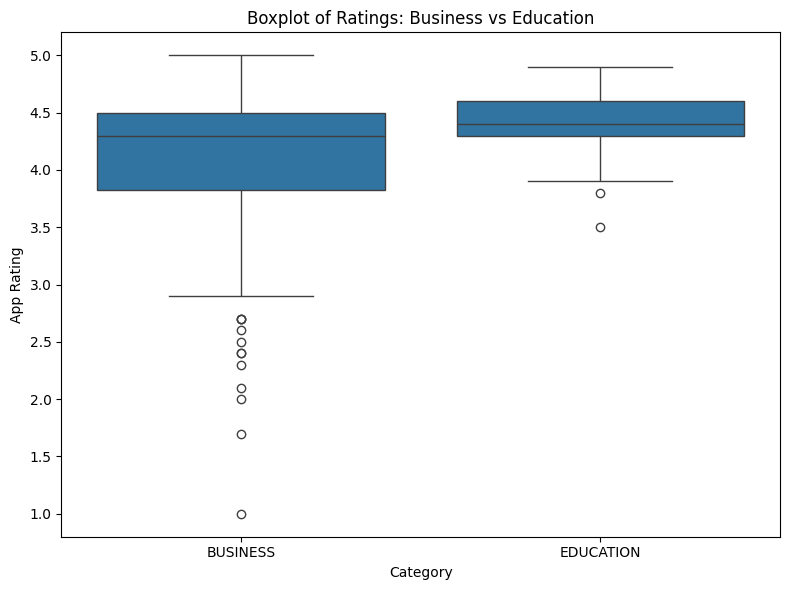

In [56]:
filtered_df = df[df['Category'].isin(['BUSINESS', 'EDUCATION'])]

plt.figure(figsize=(8,6))
sns.boxplot(
    x='Category', 
    y='Rating', 
    data=filtered_df,
    
)
plt.title("Boxplot of Ratings: Business vs Education")
plt.xlabel("Category")
plt.ylabel("App Rating")
plt.tight_layout()
plt.show()
